In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [3]:
CordobaNorte = pd.read_csv ("Cordoba_Norte.csv")

In [4]:
CordobaNorte['Fecha'] = pd.to_datetime(CordobaNorte['Fecha'], format='%m-%Y') # to date time

In [5]:
# ELIMINO ULTIMAS 10 FILAS SIN DATOS
CordobaNorte = CordobaNorte.drop(CordobaNorte.tail(10).index) 

# ELIMINO PRIMERAS 2 FILAS SIN DATOS

CordobaNorte = CordobaNorte.drop(CordobaNorte.head(2).index)



In [6]:
CordobaNorte.head()

,Fecha,Pastura de gatton panic,Pastura de gatton y gramma,Pastura de gramma,Pastura de panicum coloratum,Pastura de panicum coloratum y gramma,Campo natural,Pastura de alfalfa pura SL,Verdeo de avena,Verdeo de sorgo,Pastura de alfalfa pura,Verdeo de invierno,Pastura de agropiro,Verdeo de maiz
2,2000-03-01,641.8,698.6,305.5,375.6,533.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,171.3,247.9,112.9,106.4,266.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-05-01,115.0,239.1,209.1,122.4,176.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000-06-01,38.0,81.6,115.8,73.1,38.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000-07-01,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
CordobaNorte.isna().sum()


Fecha                                      0
Pastura de gatton panic                    0
Pastura de gatton y gramma                 0
Pastura de gramma                          0
Pastura de panicum coloratum               0
Pastura de panicum coloratum y gramma      0
Campo natural                             26
Pastura de alfalfa pura SL               192
Verdeo de avena                          256
Verdeo de sorgo                          264
Pastura de alfalfa pura                  266
Verdeo de invierno                       262
Pastura de agropiro                      252
Verdeo de maiz                           269
dtype: int64

In [8]:
CordobaNorte["Pastura de gatton panic"]

2       641.8
3       171.3
4       115.0
5        38.0
6         0.0
        ...  
273      67.0
274     206.7
275     403.0
276    1034.3
277    2456.7
Name: Pastura de gatton panic, Length: 276, dtype: float64

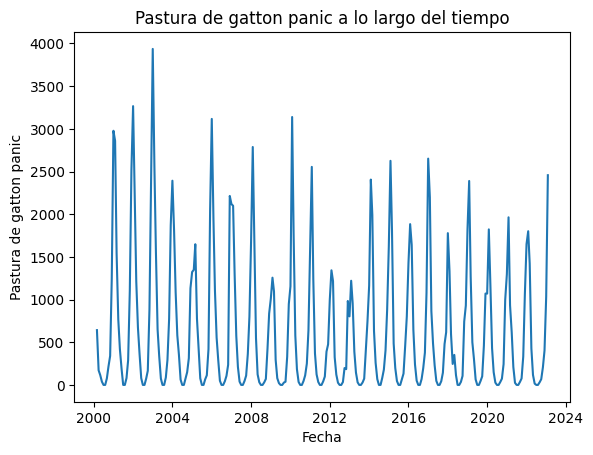

In [9]:
import matplotlib.pyplot as plt

# Crear un gráfico de línea con la columna "Pastura de gatton panic" en el eje y
plt.plot(CordobaNorte['Fecha'], CordobaNorte['Pastura de gatton panic'])

# Establecer los títulos de los ejes x e y y el título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Pastura de gatton panic')
plt.title('Pastura de gatton panic a lo largo del tiempo')

# Mostrar el gráfico
plt.show()

In [10]:
#Preparo los datos para ingresarlos a ML Prophet
cordoba = pd.DataFrame(columns=['ds',"y"])
cordoba["ds"] = CordobaNorte["Fecha"]
cordoba["y"] = CordobaNorte["Pastura de gatton panic"]

In [11]:
cordoba

,ds,y
2,2000-03-01,641.8
3,2000-04-01,171.3
4,2000-05-01,115.0
5,2000-06-01,38.0
6,2000-07-01,0.0
...,...,...
273,2022-10-01,67.0
274,2022-11-01,206.7
275,2022-12-01,403.0
276,2023-01-01,1034.3


Importing plotly failed. Interactive plots will not work.
16:54:10 - cmdstanpy - INFO - Chain [1] start processing
16:54:10 - cmdstanpy - INFO - Chain [1] done processing


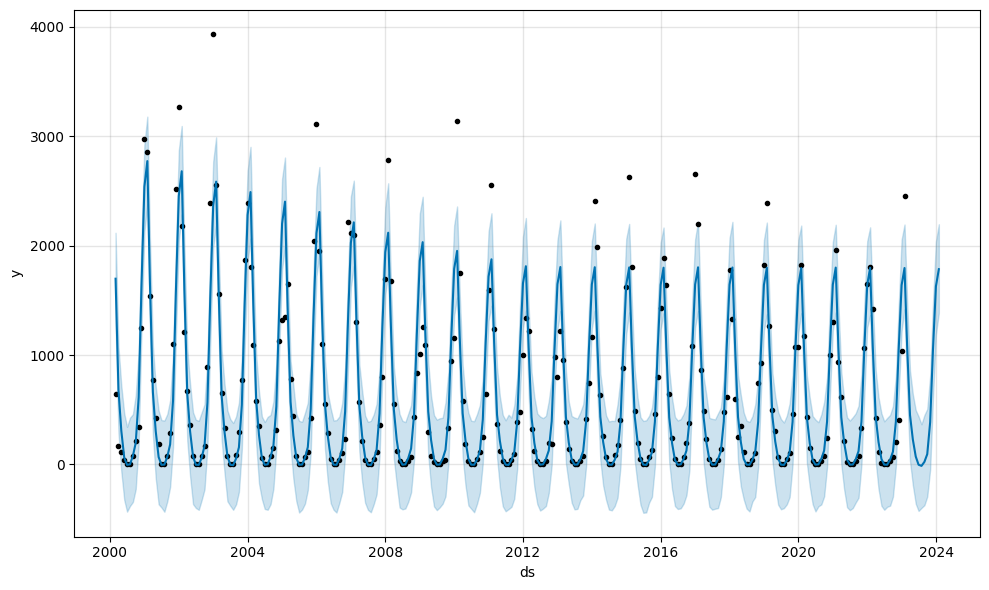

In [12]:
from prophet import Prophet

modelo = Prophet(yearly_seasonality=True, seasonality_mode='multiplicative')
modelo.add_seasonality(name='sinusoidal', period=365.25, fourier_order=5)

# Entrenar el modelo con tus datos y hacer predicciones
modelo.fit(cordoba)
futuro = modelo.make_future_dataframe(periods=12, freq='M')
predicciones = modelo.predict(futuro)

# Graficar las predicciones
fig = modelo.plot(predicciones)

In [13]:
from prophet.diagnostics import cross_validation

# Realizar una validación cruzada temporal de 3 períodos con MAE como métrica de error
df_cv = cross_validation(modelo, initial='730 days', period='365 days', horizon='90 days')
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
print('MAE:', mae)

  0%|          | 0/21 [00:00<?, ?it/s]

16:54:11 - cmdstanpy - INFO - Chain [1] start processing
16:54:12 - cmdstanpy - INFO - Chain [1] done processing
16:54:12 - cmdstanpy - INFO - Chain [1] start processing
16:54:12 - cmdstanpy - INFO - Chain [1] done processing
16:54:13 - cmdstanpy - INFO - Chain [1] start processing
16:54:13 - cmdstanpy - INFO - Chain [1] done processing
16:54:13 - cmdstanpy - INFO - Chain [1] start processing
16:54:14 - cmdstanpy - INFO - Chain [1] done processing
16:54:14 - cmdstanpy - INFO - Chain [1] start processing
16:54:15 - cmdstanpy - INFO - Chain [1] done processing
16:54:15 - cmdstanpy - INFO - Chain [1] start processing
16:54:16 - cmdstanpy - INFO - Chain [1] done processing
16:54:17 - cmdstanpy - INFO - Chain [1] start processing
16:54:17 - cmdstanpy - INFO - Chain [1] done processing
16:54:17 - cmdstanpy - INFO - Chain [1] start processing
16:54:17 - cmdstanpy - INFO - Chain [1] done processing
16:54:17 - cmdstanpy - INFO - Chain [1] start processing
16:54:17 - cmdstanpy - INFO - Chain [1]

MAE: 602.2308219594794


In [14]:
cordoba

,ds,y
2,2000-03-01,641.8
3,2000-04-01,171.3
4,2000-05-01,115.0
5,2000-06-01,38.0
6,2000-07-01,0.0
...,...,...
273,2022-10-01,67.0
274,2022-11-01,206.7
275,2022-12-01,403.0
276,2023-01-01,1034.3


In [15]:
# convertir la columna 'ds' en el índice del DataFrame
cordoba.set_index('ds', inplace=True)

# convertir el índice en un objeto de serie de tiempo
cordoba.index = pd.to_datetime(cordoba.index)

# renombro para ML
cordoba.rename(columns={'y': 'produccion'}, inplace=True)

In [16]:
cordoba

,produccion
ds,
2000-03-01,641.8
2000-04-01,171.3
2000-05-01,115.0
2000-06-01,38.0
2000-07-01,0.0
...,...
2022-10-01,67.0
2022-11-01,206.7
2022-12-01,403.0


In [17]:
import statsmodels.api as sm
# crear modelo de suavizado exponencial triple
model = sm.tsa.ExponentialSmoothing(cordoba['produccion'], trend="add", seasonal="add", seasonal_periods=12)

c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [18]:
# ajustar modelo a los datos
model_fit = model.fit()

# hacer predicciones para los próximos 12 meses
forecast = model_fit.forecast(12)

# imprimir las predicciones
print(forecast)

2023-03-01    1126.717646
2023-04-01     401.525144
2023-05-01     114.731454
2023-06-01     -34.414582
2023-07-01     -70.122749
2023-08-01     -73.816804
2023-09-01     -39.694728
2023-10-01       8.377406
2023-11-01     254.797453
2023-12-01     733.482617
2024-01-01    1326.260520
2024-02-01    1819.083448
Freq: MS, dtype: float64


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# obtener los valores reales para el último año
real_values = cordoba['produccion'].tail(12)

# calcular el error cuadrático medio y el error absoluto medio
mse = mean_squared_error(real_values, forecast)
mae = mean_absolute_error(real_values, forecast)

# imprimir los resultados
print(f"Error cuadrático medio: {mse}")
print(f"Error absoluto medio: {mae}")

Error cuadrático medio: 59308.14728723437
Error absoluto medio: 162.77952958598402
